In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install pytorch-forecasting
!pip install lightning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
import pickle
from tqdm import tqdm
import copy

In [2]:
%cd drive/MyDrive/ime_project/
!ls

/content/drive/MyDrive/ime_project
capston_EDA.ipynb  EDA_1003.ipynb  EDA_1101.ipynb	     feature_selection.ipynb  var.ipynb
data		   EDA_1010.ipynb  EDA_1102.ipynb	     lightning_logs
DL		   EDA_1019.ipynb  EDA_1201.ipynb	     result
done		   EDA_1030.ipynb  feature_selection2.ipynb  trial.ipynb


In [3]:
with open('result/final_selection.pkl', 'rb') as file:
    final_selection = pickle.load(file)

In [4]:
features = []
for i in final_selection.keys():
    # print(i)
    for j in final_selection[i]:
        if j not in features:
            features.append(j)
            # print(features)
        else: pass

In [5]:
features.append('cdate')
features

['Ahu1_inv',
 'Ahu2_inv',
 'Ahu3_inv',
 'Ahu4_inv',
 'Ahu5_inv',
 'Ahu7_inv',
 'Ahu8_inv',
 'Ahu9_inv',
 'Ahu10_inv',
 'Ahu11_inv',
 'Ahu12_inv',
 'Ahu14_inv',
 'Plant1_temperature',
 'Plant2_temperature',
 'Plant2_humidity',
 'Plant3_temperature',
 'Plant3_humidity',
 'Plant4_temperature',
 'Plant5_temperature',
 'Plant6_temperature',
 'Plant7_temperature',
 'Plant7_humidity',
 'Plant8_temperature',
 'Plant10_temperature',
 'Ahu13_inv',
 'Plant4_humidity',
 'Plant9_temperature',
 'cdate']

In [6]:
df = pd.read_csv("result/dataset.csv")#, index_col="Unnamed: 0")
df.rename(columns={'Unnamed: 0':'cdate'},inplace=True)
df.cdate = pd.to_datetime(df.cdate)
df_train = df[features]
df_train.columns = df_train.columns.str.lower()
print(len(df_train.columns))
df_train.sample(3, random_state=777)

28


,ahu1_inv,ahu2_inv,ahu3_inv,ahu4_inv,ahu5_inv,ahu7_inv,ahu8_inv,ahu9_inv,ahu10_inv,ahu11_inv,...,plant5_temperature,plant6_temperature,plant7_temperature,plant7_humidity,plant8_temperature,plant10_temperature,ahu13_inv,plant4_humidity,plant9_temperature,cdate
24171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.88,27.99,27.92,46.98,28.89,29.35,0.0,46.56,29.08,2023-06-18 04:30:00
10967,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,26.12,26.67,26.24,35.84,27.07,31.88,40.0,35.80,31.42,2023-03-18 11:50:00
7239,32.0,32.0,32.0,0.0,31.0,31.0,31.0,31.0,0.0,31.0,...,26.62,27.39,26.72,33.22,27.86,32.94,31.0,32.43,32.47,2023-02-20 14:30:00


In [7]:
df_test = pd.read_csv("result/test.csv", index_col="Unnamed: 0")
df_test.cdate = pd.to_datetime(df_test.cdate)
df_test = df_test[['cdate','plant2_temperature','plant3_temperature','plant4_temperature','plant5_temperature','plant6_temperature','plant7_temperature','plant8_temperature','plant9_temperature','plant10_temperature']]
df_test.sample(3, random_state=777)

,cdate,plant2_temperature,plant3_temperature,plant4_temperature,plant5_temperature,plant6_temperature,plant7_temperature,plant8_temperature,plant9_temperature,plant10_temperature
5827,2023-09-10 11:10:00,26.67,27.14,26.85,27.03,26.11,25.65,27.35,31.32,31.36
511,2023-08-04 13:10:00,27.18,27.73,27.40,27.09,27.43,27.42,27.88,32.38,32.31
5960,2023-09-11 09:20:00,27.53,27.74,27.55,27.74,27.45,27.07,28.33,30.08,30.17


In [8]:
unique = ['plant1_temperature']
df_train.drop(unique, axis=1, inplace=True)
df_train.sample(3, random_state=777)

,ahu1_inv,ahu2_inv,ahu3_inv,ahu4_inv,ahu5_inv,ahu7_inv,ahu8_inv,ahu9_inv,ahu10_inv,ahu11_inv,...,plant5_temperature,plant6_temperature,plant7_temperature,plant7_humidity,plant8_temperature,plant10_temperature,ahu13_inv,plant4_humidity,plant9_temperature,cdate
24171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.88,27.99,27.92,46.98,28.89,29.35,0.0,46.56,29.08,2023-06-18 04:30:00
10967,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,26.12,26.67,26.24,35.84,27.07,31.88,40.0,35.80,31.42,2023-03-18 11:50:00
7239,32.0,32.0,32.0,0.0,31.0,31.0,31.0,31.0,0.0,31.0,...,26.62,27.39,26.72,33.22,27.86,32.94,31.0,32.43,32.47,2023-02-20 14:30:00


In [9]:
list(df.columns) == list(df_test.columns)

False

In [10]:
import torch

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
from lightning.pytorch.tuner import Tuner

from pytorch_forecasting import TimeSeriesDataSet, DeepAR, Baseline
from pytorch_forecasting.metrics import SMAPE, MultivariateNormalDistributionLoss, MultiLoss
from pytorch_forecasting.data.encoders import TorchNormalizer

In [11]:
if torch.cuda.is_available():
  print("GPU is available")
  device = torch.device("cuda")
else:
  print("GPU is not available")
  device = torch.device("cpu")

GPU is available


In [12]:
min_date = df_train['cdate'].min()
df_train['time_idx'] = df_train['cdate'].apply(lambda x: (x - min_date).total_seconds()/60/10) # 10분단위로 timestamp
df_train['time_idx'] = df_train['time_idx'].astype(int)
df_train['onoff'] = df_train.loc[:, 'ahu1_inv':'ahu10_inv'].apply(lambda row: 1 if any(row != 0) else 0, axis=1)
df_train.sample(3, random_state=777)

,ahu1_inv,ahu2_inv,ahu3_inv,ahu4_inv,ahu5_inv,ahu7_inv,ahu8_inv,ahu9_inv,ahu10_inv,ahu11_inv,...,plant7_temperature,plant7_humidity,plant8_temperature,plant10_temperature,ahu13_inv,plant4_humidity,plant9_temperature,cdate,time_idx,onoff
24171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.92,46.98,28.89,29.35,0.0,46.56,29.08,2023-06-18 04:30:00,24171,0
10967,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,26.24,35.84,27.07,31.88,40.0,35.80,31.42,2023-03-18 11:50:00,10967,1
7239,32.0,32.0,32.0,0.0,31.0,31.0,31.0,31.0,0.0,31.0,...,26.72,33.22,27.86,32.94,31.0,32.43,32.47,2023-02-20 14:30:00,7239,1


In [13]:
df_test['time_idx'] = df_test['cdate'].apply(lambda x: (x - min_date).total_seconds()/60/10) # 10분단위로 timestamp
df_test['time_idx'] = df_test['time_idx'].astype(int)
df_test.sample(3, random_state=777)

,cdate,plant2_temperature,plant3_temperature,plant4_temperature,plant5_temperature,plant6_temperature,plant7_temperature,plant8_temperature,plant9_temperature,plant10_temperature,time_idx
5827,2023-09-10 11:10:00,26.67,27.14,26.85,27.03,26.11,25.65,27.35,31.32,31.36,36307
511,2023-08-04 13:10:00,27.18,27.73,27.40,27.09,27.43,27.42,27.88,32.38,32.31,30991
5960,2023-09-11 09:20:00,27.53,27.74,27.55,27.74,27.45,27.07,28.33,30.08,30.17,36440


In [55]:
# 과거 7일치의 데이터를 바탕으로 미래 2일치의 데이터를 예측한다.
max_encoder_length = 6*24*2
max_prediction_length = 6*6
training_cutoff = df_train['time_idx'].max()-max_prediction_length

In [56]:
df_train.columns

Index(['ahu1_inv', 'ahu2_inv', 'ahu3_inv', 'ahu4_inv', 'ahu5_inv', 'ahu7_inv',
       'ahu8_inv', 'ahu9_inv', 'ahu10_inv', 'ahu11_inv', 'ahu12_inv',
       'ahu14_inv', 'plant2_temperature', 'plant2_humidity',
       'plant3_temperature', 'plant3_humidity', 'plant4_temperature',
       'plant5_temperature', 'plant6_temperature', 'plant7_temperature',
       'plant7_humidity', 'plant8_temperature', 'plant10_temperature',
       'ahu13_inv', 'plant4_humidity', 'plant9_temperature', 'cdate',
       'time_idx', 'onoff'],
      dtype='object')

In [57]:
# 각 온도 열에 대해 결측값 표시 변수 추가
for col in df_train.columns:
    missing_col_name = col + "_missing"
    df_train[missing_col_name] = df_train[col].isna().astype(int)

    # 결측값을 평균값으로 채우기
    df_train[col].fillna(df_train[col].mean(), inplace=True)
    df_train.drop(missing_col_name, inplace=True, axis=1)

In [58]:
df_train.isna().any().any() # 전체 columns에 걸쳐 NaN값이 없다.

False

In [59]:
training = TimeSeriesDataSet(
    df_train[lambda x: x.time_idx <= int(training_cutoff)],
    time_idx="time_idx",  # time index
    group_ids=['onoff'],
    target='plant2_temperature',  # 예측 대상 목표(target) 변수들
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # 시간이 지나도 변하지 않는 범주형 변수
    static_reals=[],  # 시간이 지나도 변하지 않는 연속형 변수
    time_varying_known_reals=[
       'ahu1_inv', 'ahu2_inv', 'ahu3_inv', 'ahu4_inv', 'ahu5_inv', 'ahu7_inv',
       'ahu8_inv', 'ahu9_inv', 'ahu10_inv', 'ahu11_inv', 'ahu12_inv', 'ahu13_inv',
       'ahu14_inv',
    ],  # 시간이 지나면서 알려진 연속형 변수
    time_varying_known_categoricals=[],  # 시간이 지나면서 알려진 범주형 변수
    time_varying_unknown_reals=['plant2_temperature'],
    # , 'plant3_temperature', 'plant4_temperature',  'plant5_temperature', 'plant6_temperature', 'plant7_temperature',  'plant8_temperature', 'plant9_temperature', 'plant10_temperature',
    # 'plant2_humidity', 'plant3_humidity', 'plant7_humidity', 'plant4_humidity'],  # 시간이 지나면서 알려지지 않은 연속형 변수
    time_varying_unknown_categoricals=[],
    allow_missing_timesteps=True,
    target_normalizer=TorchNormalizer(method='identity', center=True, transformation=None, method_kwargs={}),
    add_target_scales=True,

)

In [60]:
validation = TimeSeriesDataSet.from_dataset(training, df_train, min_prediction_idx=training_cutoff + 1)

In [61]:
batch_size = 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [62]:
pl.seed_everything(42)

if torch.cuda.is_available():
    accelerator="gpu"
else:
    accelerator='cpu'

trainer = pl.Trainer(
    gradient_clip_val=0.1,
    accelerator=accelerator,
)
loss = MultiLoss([MultivariateNormalDistributionLoss(rank=30) for _ in range(9)])

net = DeepAR.from_dataset(
    training,
    learning_rate=3e-2,
    hidden_size=30,
    rnn_layers=2,
    loss=MultivariateNormalDistributionLoss(rank=10),
    optimizer='Adam'
)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [63]:
res = Tuner(trainer).lr_find(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    min_lr=1e-5,
    max_lr=1e0,
    early_stop_threshold=100,
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.001778279410038923
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.001778279410038923
INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/ime_project/.lr_find_af25c57d-06d4-4dde-acf5-ac8bef9f69ba.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/ime_project/.lr_find_af25c57d-06d4-4dde-acf5-ac8bef9f69ba.ckpt
INFO: Restored all states from the checkpoint at /content/drive/MyDrive/ime_project/.lr_find_af25c57d-06d4-4dde-acf5-ac8bef9f69ba.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/MyDrive/ime_project/.lr_find_af25c57d-06d4-4dde-acf5-ac8bef9f69ba.ckpt


suggested learning rate: 0.0019952623149688802


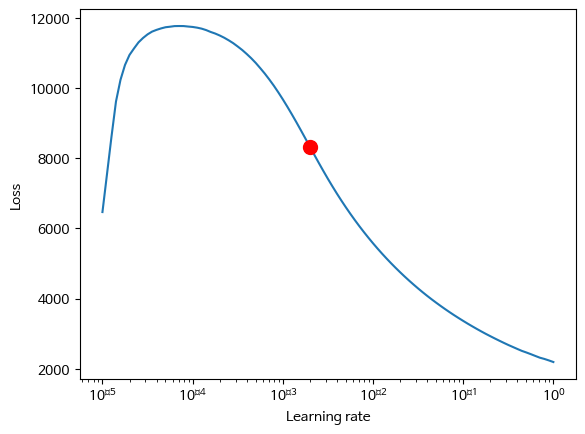

In [35]:
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [64]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")

trainer = pl.Trainer(
    max_epochs=30,
    accelerator=accelerator,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback],
    limit_train_batches=50,
    enable_checkpointing=True,
)

net = DeepAR.from_dataset(
    training,
    learning_rate=res.suggestion(),
    log_interval=10,
    log_val_interval=1,
    hidden_size=30,
    rnn_layers=2,
    loss=MultivariateNormalDistributionLoss(rank=30),
    optimizer='Adam'
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [65]:
trainer.fit(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name                   | Type                               | Params
------------------------------------------------------------------------------
0 | loss                   | MultivariateNormalDistributionLoss | 0     
1 | logging_metrics        | ModuleList                         | 0     
2 | embeddings             | MultiEmbedding                     | 0     
3 | rnn                    | LSTM                               | 13.3 K
4 | distribution_projector | Linear                             | 992   
------------------------------------------------------------------------------
14.3 K    Trainable params
0         Non-trainable params
14.3 K    Total params
0.057     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name                   | Type                               | Params
---------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [66]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_model = DeepAR.load_from_checkpoint(best_model_path)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


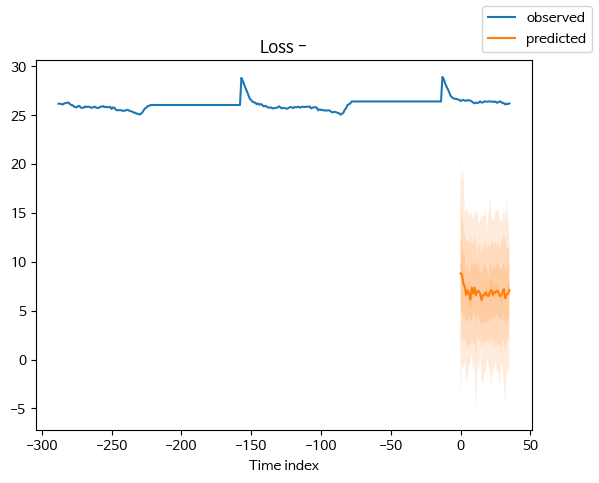

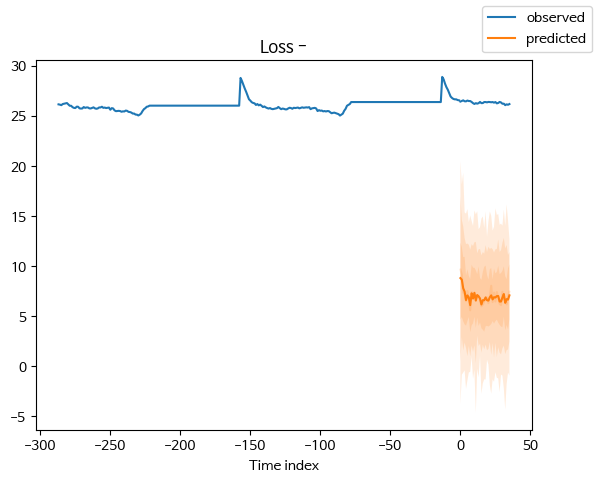

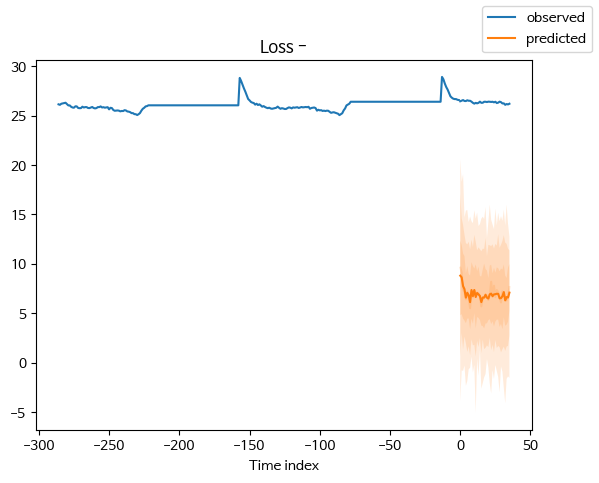

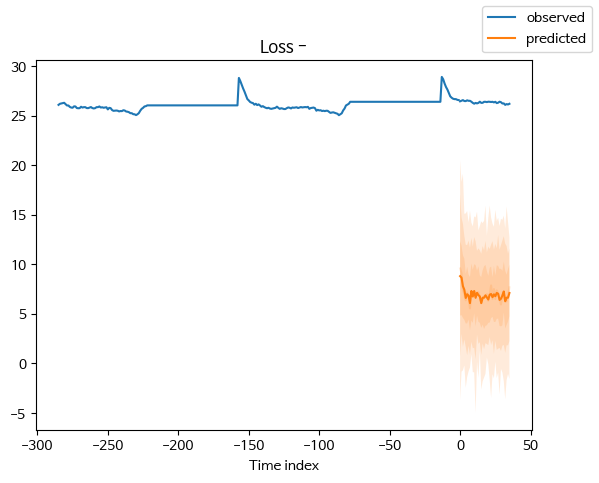

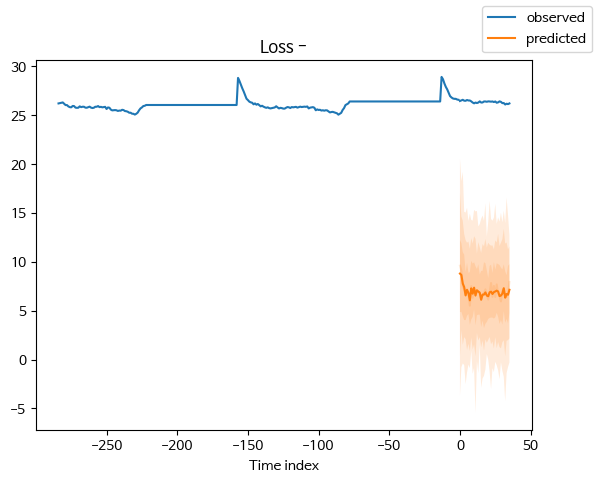

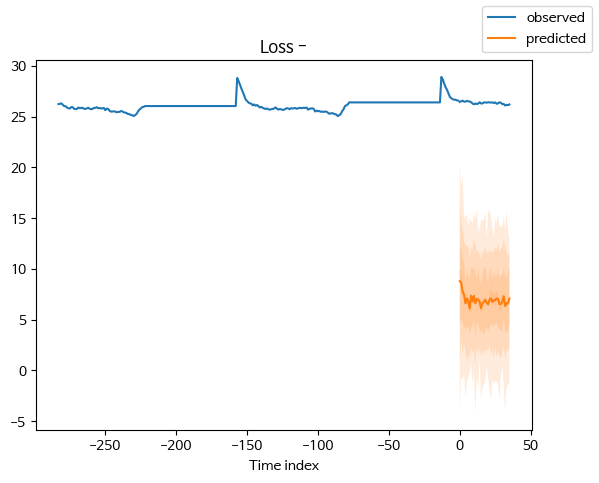

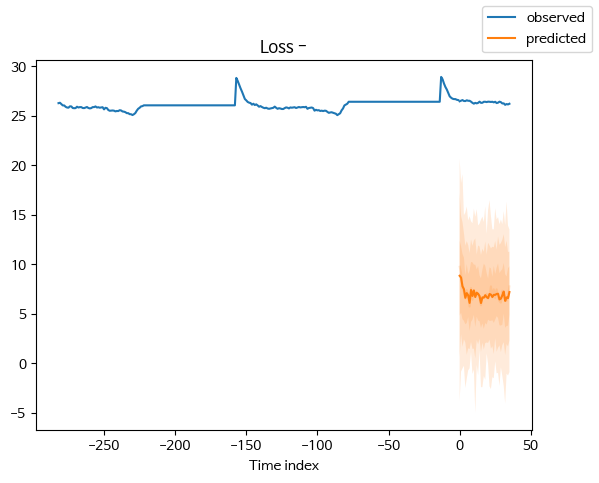

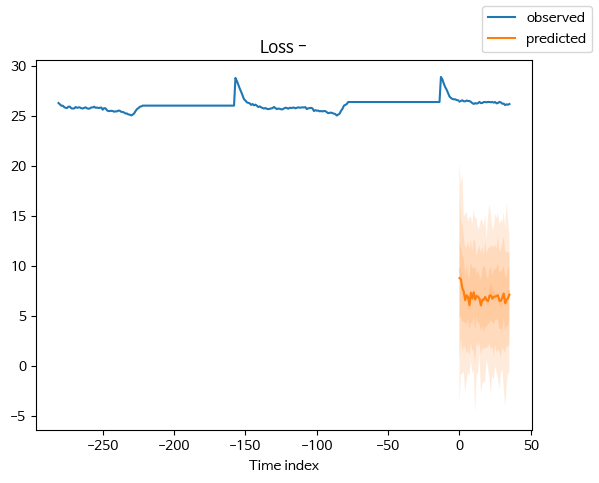

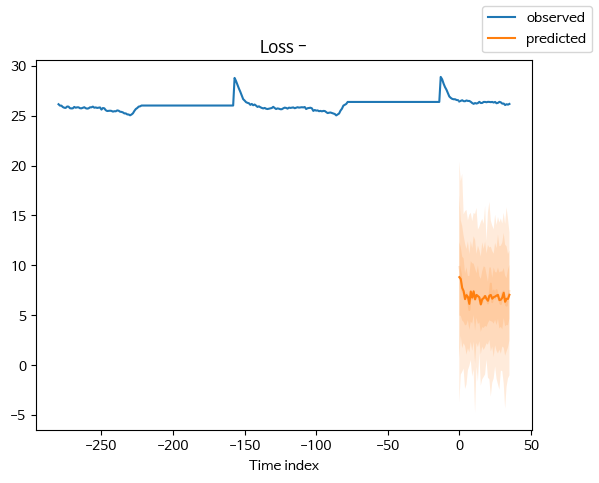

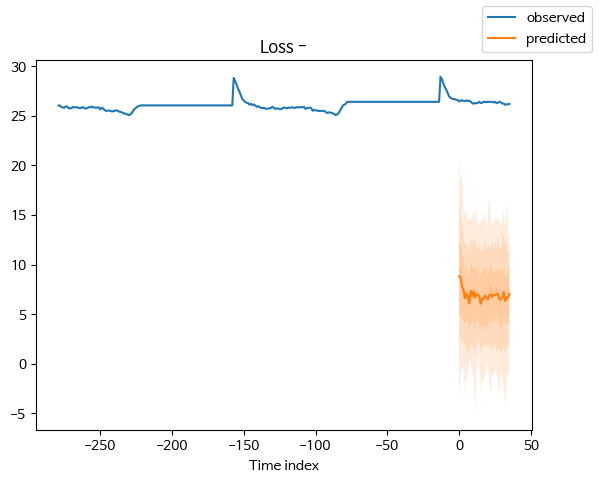

In [67]:
raw_predictions = best_model.predict(val_dataloader, mode="raw", return_x=True)
for idx in range(10):  # plot 10 examples
    best_model.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True)